# Spark Funds - Investment Analysis Assignment


Checking if required packages are installed...
All required packages are installed continuing with the program...
Identifying the OS to choose appropriate encoding of files... 
Operating System is Windows
Loading companies.txt file...
Using ANSI encoding for reading companies.txt...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
Loading rounds2.csv file...
Using ANSI encoding for reading rounds2.csv...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 

Social, Finance, Analytics, Advertising                           8010

	 GBR 
                                          main_sector_investments_Count
main_sector                                                           
Automotive & Sports                                                 54
Cleantech / Semiconductors                                         456
Entertainment                                                      157
Health                                                             126
Manufacturing                                                      132
News, Search and Messaging                                         265
Others                                                             615
Social, Finance, Analytics, Advertising                            460

	 IND 
                                          main_sector_investments_Count
main_sector                                                           
Automotive & Sports                                        

,Questions,USA,GBR,IND
0,5.1. Total number of investments (count),40372,2265,984
1,5.2. Total amount of investment (USD),4.6838e+11,2.24084e+10,1.59819e+10
2,5.3. Top sector (based on count of investments),Others,Others,Others
3,5.4. Second-best sector (based on count of inv...,Cleantech / Semiconductors,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"
4,5.5. Third-best sector (based on count of inve...,"Social, Finance, Analytics, Advertising",Cleantech / Semiconductors,"News, Search and Messaging"
5,5.6. Number of investments in the top sector (...,9847,615,355
6,5.7. Number of investments in the second-best ...,8416,460,172
7,5.8. Number of investments in the third-best s...,8010,456,154
8,"5.9. For the top sector count-wise (point 3), ...",SoFi,OneWeb,Flipkart
9,5.10. For the second-best sector count-wise (p...,Freescale Semiconductor,Mereo,ShopClues.com



6.1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity  and the average amount of investment in each funding type. This chart should make it clear that a  certain funding type (FT) is best suited for Spark Funds.


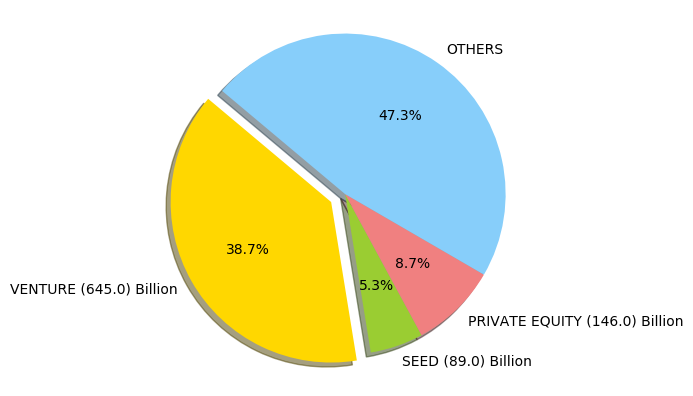

From the above pie chart, it is very clear that  VENTURE funding is the most suitable investement for Spark Funds.


6.2. A plot showing the top 9 countries against the total amount of investments of funding type  VENTURE 
. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.


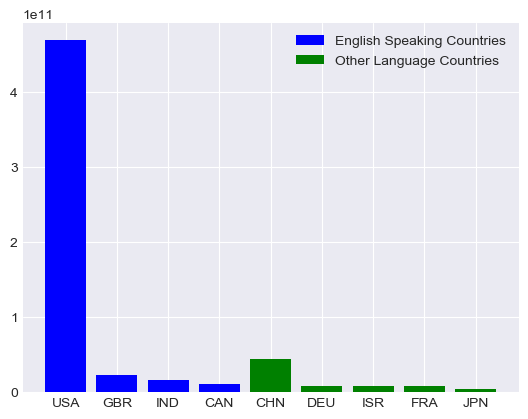

From the above chart it is very clear that  ['UnitedStates', 'UnitedKingdom', 'India']  are the Top 3 countries,
where most of the  VENTURE  fund's are invested.


6.3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
 (for the chosen investment type  VENTURE  ).
 This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.


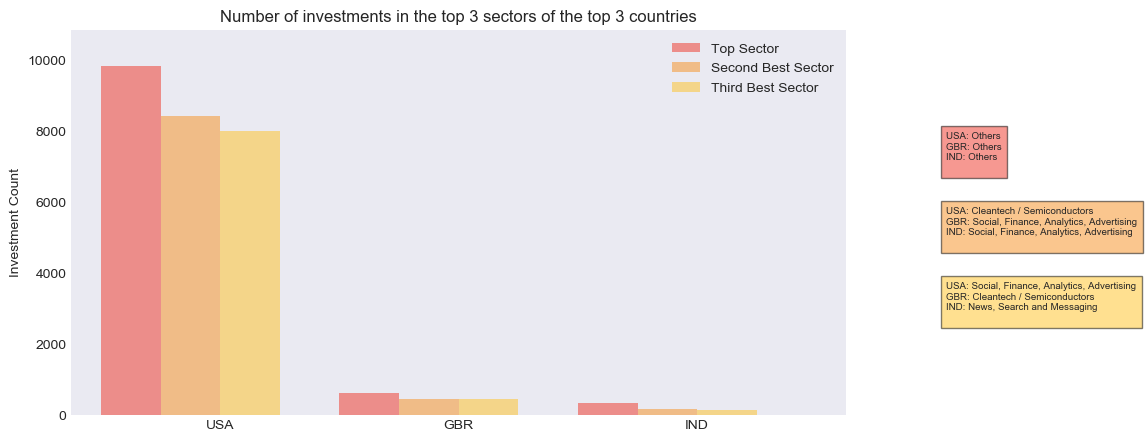


5.0 which main sectors and countries would you recommend Spark Funds to invest in?
Recommended countries and there main sectors are,
Recommended countries: USA, Great Britain and India
Recommended sectors in USA, GBR and IND is "Others" and "Social, Finance, Analytics, Advertising"
"Cleantech / Semiconductors" is recommended only for GBR and USA
"News, Search and Messaging" is recommended only for IND


---------------------------------------------End-----------------------------------------------------


In [2]:
####################################################################################################################
## 
##  Program name         : Investment_Analysis_Assignment.ipynb
##  Description          : Spark Funds - Investment Analysis Assignment
##  Author               : Sunil Yousef
##  Initial Version      : 10-07-2018
##
####################################################################################################################

import importlib.util
import sys

#----------- checking required packages are installed ----------#
print("\nChecking if required packages are installed...")
required_package_names = ['pandas', 'numpy', 'platform', 'pycountry',
                          'PyPDF2', 'IPython', 're', 'matplotlib.pyplot',
                         'seaborn']
for package in required_package_names:
    spec = importlib.util.find_spec(package)
    if spec is None:
        sys.exit("Package " + package +" is not installed please install the same and restart the program.")
print("All required packages are installed continuing with the program...")

#----------- continuing with import ----------------------------#
import pandas as pd
import numpy as np
import platform as pl
import pycountry
import PyPDF2 as pdf
import re
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Identify the operating system in which this code is running to choose the proper encoding
OS = pl.system()
print("Identifying the OS to choose appropriate encoding of files... \nOperating System is", OS)

def read_file(file_name, file_ext, seperator):
    print("Loading " + file_name + file_ext + " file...") 
    if OS=="Windows":
        use_encoding = "ANSI"
    else:
        use_encoding = "ISO-8859-1"
    print("Using " + use_encoding + " encoding for reading " + file_name + file_ext + "...")
    if file_ext == '.csv':
        loaded_file = pd.read_csv(file_name + file_ext, encoding = use_encoding)
    else:
        loaded_file = pd.read_csv(file_name + file_ext, sep=seperator, encoding = use_encoding)
    loaded_file.head()
    loaded_file.describe()
    loaded_file.info()    
    return loaded_file

#-------------------------------------------------Data Cleaning 1-------------------------------------------------#

# Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.
companies = read_file('companies', '.txt', '\t')
rounds2 = read_file('rounds2', '.csv', '')

# Both permalink and company_permalink has same names in differnt cases, convert to upper case to consider them as same company. 
companies['permalink'] = companies['permalink'].str.upper().str.strip()
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper().str.strip()

print("\n1.1.1 How many unique companies are present in rounds2? = ", rounds2.company_permalink.nunique())
print("\n1.1.2 How many unique companies are present in companies? = ", companies.permalink.nunique())

# Find which column's unique elements count is equal to the number of rows, and take that column as unique key
comp_df_description = companies.describe()
filter = next(index for index, value in enumerate(comp_df_description.loc['unique']) if value == len(companies.index))
unique_key = comp_df_description.loc['unique'].iloc[[filter]]

print("\n1.1.3 In the companies data frame, which column can be used as the unique key for each company?", 
      "Write the name of the column.", "\n\tColumn name = \"", unique_key.index[0].upper(), "\" ",
      "\n\tThis is because the column's unique element count is equal to the number of rows(", 
      len(companies.index), ") in companies data set.")

## Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
## Name the merged frame master_frame. How many observations are present in master_frame?
print("\nCreating master_frame by Merging the two data frames to add all columns in companies frame to rounds2 data frame...")
master_frame = rounds2.merge(companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame.head()
master_frame.info()

## Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
print("\n1.1.4 Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N")

## If the number of unique companies in companies dataframe and master_frame are same after inner merge
## then there are no companies in rounds2 file which is not present in companies file
if master_frame.permalink.nunique() == companies.permalink.nunique():
    print("Answer =  \" N \".")
else:
    print("Answer =  \" Y \".")
print("\n1.1.5 How many observations are present in master_frame? =", master_frame.shape[0])

## Impute the total number of missing values(NA values) in the data frame raised_amount_usd with mean
print("\nImputing the missing values(NA values) in the data frame raised_amount_usd with mean...")
if master_frame.isnull().any()["raised_amount_usd"] == True:
    mean_raised_amount_usd = round(master_frame['raised_amount_usd'].mean()) #Calculate the mean value of raised amount
    master_frame.loc[np.isnan(master_frame['raised_amount_usd']), ['raised_amount_usd']] = mean_raised_amount_usd
    print("After imputing with the mean value ", mean_raised_amount_usd)
    print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

##-------------------------------------------------------------------------------------------------------------------##
##                                       Funding Type Analysis                                                       ##
##                     Calculate the most representative value of the investment amount,                             ##
##               for each of the four funding types (venture, angel, seed, and private equity)                       ##
##-------------------------------------------------------------------------------------------------------------------##

## Average funding of each funding types
average_funding_all = pd.DataFrame(master_frame.groupby("funding_round_type").raised_amount_usd.mean().\
                                   sort_values(ascending = False))

print("\nAverage funding of each funding types... \n", round(average_funding_all))
print("\n2.1.1 Average funding amount of venture type? =", round(average_funding_all.loc['venture'][0]))
print("\n2.1.2 Average funding amount of angel type? =", round(average_funding_all.loc['angel'][0]))
print("\n2.1.3 Average funding amount of seed type? =", round(average_funding_all.loc['seed'][0]))
print("\n2.1.4 Average funding amount of private equity type? =", round(average_funding_all.loc['private_equity'][0]))

average_funding_all['Decision'] = average_funding_all.loc[['venture', 'angel', 'seed', 'private_equity']]['raised_amount_usd'].\
      apply(lambda x :np.where(round(x) in range(5000000, 15000000), True, False))

# Find the most suitable investement type
suitable_investment_type = average_funding_all.loc[average_funding_all.Decision == True].index[0]

print("\n2.1.5\tConsidering that Spark Funds wants to invest between 5 to 15 million USD per investment round,",
      "\n\twhich investment type is the most suitable for it ? ",
      "\n\tThe most suitable investment type is ",
      suitable_investment_type.upper())


##--------------------------------------------------------------------------------------------------------------------##
##                                           Country Analysis                                                         ##
##     Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type.    ##
##               This is a part of its broader strategy to invest where most investments are occurring.               ##
##--------------------------------------------------------------------------------------------------------------------##

## Cleaning country data

print("\nFinding which Country has highest frequency...")
top_country = master_frame.country_code.describe().top # which country has higher frequency 
print("Replacing null values at country code with most frequently occurred country i.e.", top_country)
master_frame.loc[master_frame['country_code'].isnull(), ['country_code']] = top_country

##---------------------------------------------------------------------------------------------------##
## Spark Funds wants to see the top nine countries which have received the highest total funding
## (across ALL sectors for the chosen investment type)
##---------------------------------------------------------------------------------------------------##

## So For further analysis, filter the data so it only contains the chosen investment type.
venture_frame = pd.DataFrame(master_frame[master_frame.funding_round_type == suitable_investment_type])
venture_frame.head()

##---------------------------------------------------------------------------------------------------##
## For the chosen investment type, make a data frame named top9 with the top nine countries
## (based on the total investment amount each country has received)
##---------------------------------------------------------------------------------------------------##

## First group and sort the countries and based on raised amount then get the top9 countres from the sorted list into a series
top9_countries_series = venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)[0:9,]
print("\nThe top nine countries and there total investments are : \n", top9_countries_series)

## Now subset the venture frame data frame to get the collection of top9 invested countries
top9 = pd.DataFrame(venture_frame.loc[venture_frame.country_code.isin(top9_countries_series.index), :])
top9.head()

##---------------------------------------------------------------------------------------------------##
## Identify the top three English-speaking countries in the data frame top9.
##---------------------------------------------------------------------------------------------------##

## First load the file "Countries_where_English_is_an_official_language.pdf"
pdf_object = open('Countries_where_English_is_an_official_language.pdf', 'rb')
pdf_reader = pdf.PdfFileReader(pdf_object)
num_pages = pdf_reader.numPages
count = 0
text = ""
while count < num_pages:
    page_object = pdf_reader.getPage(count)
    count += 1
    text += page_object.extractText()

## Next get the actual country name for the corresponding country codes and  
## check if the name is present in the contents extracted from the pdf file.
english_speaking_countries = pd.DataFrame(columns=['Country_Code', 'Country_Name'])
index = 0
for country_code in top9_countries_series.index:
    country = pycountry.countries.get(alpha_3=country_code)
    name = country.name.replace(" ", "") #strip all white spaces from country name as the pdf extract removes it
    if name in text:
        english_speaking_countries.loc[index] = [country_code, name]
        index += 1
        
print("\nThe English-speaking countries in the data frame top9 are \n", english_speaking_countries)

## 3.1.1 Top English-speaking country
print("\n3.1.1 Top English-speaking country")
print("\tCountry code =", english_speaking_countries.iloc[0][0], "\n\tCountry Name =", english_speaking_countries.iloc[0][1])

## 3.1.2 Second English-speaking country
print("\n3.1.2 Second English-speaking country")
print("\tCountry code =", english_speaking_countries.iloc[1][0], "\n\tCountry Name =", english_speaking_countries.iloc[1][1])

## 3.1.3 Third English-speaking country
print("\n3.1.3 Third English-speaking country")
print("\tCountry code =", english_speaking_countries.iloc[2][0], "\n\tCountry Name =", english_speaking_countries.iloc[2][1])

"""
--------------------------------------------------------------------------------------------------------------------
                                           Sector Analysis 1                                                        
     Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type.    
               This is a part of its broader strategy to invest where most investments are occurring.               
--------------------------------------------------------------------------------------------------------------------
 When we say sector analysis, we refer to one of the eight main sectors listed in the mapping file                  
 (note that ‘Other’ is one of the eight main sectors; also, there are eight sectors if you consider                 
 the category 'Blanks' as a missing value). This is to simplify the analysis by grouping the numerous               
 category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists       
 such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.                  
 Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). 
 For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.          
 Apply the business rule that the first string before the vertical bar will be considered as the primary sector     
 In the example above, ‘Application Platforms’ will be considered the primary sector.                               
--------------------------------------------------------------------------------------------------------------------
"""

## removing rows which has category_list as null values
print("\nRemoving rows from top9 which has category_list as null values.")
top9 = top9[top9.category_list.isnull() == False]
#print(top9.isnull().sum())

## Extract the primary sector of each category list from the category_list column
top9['primary_sector'] = top9['category_list'].str.split('|').str[0]

## Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
## (Note that ‘Others’ is also considered one of the main sectors)
mapping = read_file('mapping', '.csv', '')

## Formatting mapping data frame
print("\nFormatting the mapping data frame for easly identifying the main sectors...")
mapping = mapping[mapping.isnull().sum(axis=1) <= 0] ## remove the row which has null value at catagory list
mapping[mapping.columns[1:10]] = mapping[mapping.columns[1:10]].astype(bool) ## convert the data in main sector columns to bool

## Add a new column to mapping dataframe with main sector names based on boolean condition.
mapping['main_sector'] = mapping[mapping.columns[1:10]].idxmax(axis=1)

## Expected Results: Code for a merged data frame with each primary sector mapped to its main sector 
## (the primary sector should be present in a separate column).
print("\nMerging the main_sector column of mapping data frame with top9")
top9 = pd.merge(top9, mapping[['main_sector', 'category_list']], left_on='primary_sector', right_on='category_list', how='left')
#print(top9)

## Data cleaning of main_sector column
print("\nFilling the missing values on main_sector column of top9 after merging...")

## Create a new mapping dictionary of main sector's
mapping_main_sector_dict = {} # empty mapping dictionary
for mapping_main_sector in mapping.columns[1:-1].tolist():
    for sub_sector in re.findall(r"[\w']+", mapping_main_sector): # we are looking only for words
        if sub_sector.strip() != "and":
            mapping_main_sector_dict[sub_sector.strip()] = mapping_main_sector.strip()
#print(mapping_main_sector_dict)

## Get the list of primary sectors who's main sector is null
primary_sector_list = top9.loc[top9.main_sector.isna()]['primary_sector'].drop_duplicates()
typeof_top9_main_sector = top9['main_sector'].dtype # keep the orginal type before converting to a category
top9['main_sector'] = top9['main_sector'].astype('category') # convert main_sector series to category

## fill the empty primary sector with matching main sectors from mapping_main_sector_dict
for primary_sector in primary_sector_list:
    if primary_sector in mapping_main_sector_dict:
        top9.main_sector[top9.primary_sector == primary_sector] = mapping_main_sector_dict[primary_sector]
        print("Assigning the main sector of " + primary_sector + " as \'" + mapping_main_sector_dict[primary_sector] + "\'")
    else:
        for category in mapping_main_sector_dict:
            if category in primary_sector:
                top9.main_sector[top9.primary_sector == primary_sector] = mapping_main_sector_dict[category]
                print("Assigning the main sector of " + primary_sector + " as \'" + mapping_main_sector_dict[category] + "\'")

## fill others for rest of the missing values
print("Assigning the main sector of rest of the missing values as \'Others\'...")
top9.main_sector[top9.main_sector.isna()] = 'Others'

## convert back to orginal type
top9['main_sector'] = top9['main_sector'].astype(typeof_top9_main_sector)

"""
-----------------------------------------------------------------------------------------------------------------------
                                            Sector Analysis 2                                                        
Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT 
and investments range of 5-15 M USD). 
1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding
type FT falling within the 5-15 million USD range. The three data frames should contain:                   
    * All the columns of the master_frame along with the primary sector and the main sector                              
    * The total number (or count) of investments for each main sector in a separate column
    * The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector. 
Result Expected 
    1. Three data frames D1, D2 and D3 
    2. Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend 
    Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective 
    (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors 
    where most investments are occurring. 
-----------------------------------------------------------------------------------------------------------------------
"""

##-----------------------------------------------------------------------------------------------------------------------##
## 1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding
## type FT falling within the 5-15 million USD range.                   
## The three data frames should contain All the columns of the master_frame along with the primary sector and the main sector
## Use top9 dataframe to match the criterias.
##-----------------------------------------------------------------------------------------------------------------------##

# Subset the data frame based on first english country
D1 = pd.DataFrame(top9[top9.country_code == english_speaking_countries.iloc[0][0]])

# Subset the data frame based on second english country
D2 = pd.DataFrame(top9[top9.country_code == english_speaking_countries.iloc[1][0]])

# Subset the data frame based on third english country
D3 = pd.DataFrame(top9[top9.country_code == english_speaking_countries.iloc[2][0]])

##-----------------------------------------------------------------------------------------------------------------------##
## The three data frames should contain,
## The total number (or count) of investments for each main sector in D1, D2 and D3
##-----------------------------------------------------------------------------------------------------------------------##

# Get the count of each main_sectors for first english country
D1_main_sector_investments_count = pd.DataFrame(D1.groupby('main_sector')['main_sector'].count())
D1_main_sector_investments_count.rename(columns={"main_sector": "main_sector_investments_Count"}, inplace=True)

# Get the count of each main_sectors for second english country
D2_main_sector_investments_count = pd.DataFrame(D2.groupby('main_sector')['main_sector'].count())
D2_main_sector_investments_count.rename(columns={"main_sector": "main_sector_investments_Count"}, inplace=True)

# Get the count of each main_sectors for third english country
D3_main_sector_investments_count = pd.DataFrame(D3.groupby('main_sector')['main_sector'].count())
D3_main_sector_investments_count.rename(columns={"main_sector": "main_sector_investments_Count"}, inplace=True)

print("\nTotal number (or count) of investments for each main sector for top 3 countries are,")
print("\n\t", english_speaking_countries.iloc[0][0], "\n", D1_main_sector_investments_count)
print("\n\t", english_speaking_countries.iloc[1][0], "\n", D2_main_sector_investments_count)
print("\n\t", english_speaking_countries.iloc[2][0], "\n", D3_main_sector_investments_count)

## Concat the count of respective investment column's with D1, D2 and D3 dataframe's
D1 = pd.concat([D1, D1_main_sector_investments_count], axis = 1)
D2 = pd.concat([D2, D2_main_sector_investments_count], axis = 1)
D3 = pd.concat([D3, D3_main_sector_investments_count], axis = 1)

##-----------------------------------------------------------------------------------------------------------------------##
## The three data frames should contain,
## The total amount invested in each main sector of D1, D2 and D3 in a separate column of rexpective dataframe
##-----------------------------------------------------------------------------------------------------------------------##

# Get the total amount invested for each main_sectors in first english country
D1_total_amount_invested = pd.DataFrame(D1.groupby('main_sector')['raised_amount_usd'].sum())
D1_total_amount_invested.rename(columns={"raised_amount_usd": "total_amount_invested"}, inplace=True)

# Get the total amount invested for each main_sectors in second english country
D2_total_amount_invested = pd.DataFrame(D2.groupby('main_sector')['raised_amount_usd'].sum())
D2_total_amount_invested.rename(columns={"raised_amount_usd": "total_amount_invested"}, inplace=True)

# Get the total amount invested for each main_sectors in third english country
D3_total_amount_invested = pd.DataFrame(D3.groupby('main_sector')['raised_amount_usd'].sum())
D3_total_amount_invested.rename(columns={"raised_amount_usd": "total_amount_invested"}, inplace=True)

print("\nThe total amount invested in each main sector for top 3 countries are,")
print("\n\t", english_speaking_countries.iloc[0][0], "\n", D1_total_amount_invested)
print("\n\t", english_speaking_countries.iloc[1][0], "\n", D2_total_amount_invested)
print("\n\t", english_speaking_countries.iloc[2][0], "\n", D3_total_amount_invested)

## Concat the total amount of respective investment column's with D1, D2 and D3 dataframe's
D1 = pd.concat([D1, D1_total_amount_invested], axis = 1, sort=True)
D2 = pd.concat([D2, D2_total_amount_invested], axis = 1, sort=True)
D3 = pd.concat([D3, D3_total_amount_invested], axis = 1, sort=True)


##-----------------------------------------------------------------------------------------------------------------------##
## 2. Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend              ## 
##     Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective            ## 
##     (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors       ## 
##     where most investments are occurring.                                                                             ##
##-----------------------------------------------------------------------------------------------------------------------##

## Create an empty data frame to store our results and for displaying later.
col_names =  ['Questions', 
              english_speaking_countries.iloc[0][0],
              english_speaking_countries.iloc[1][0], 
              english_speaking_countries.iloc[2][0]
             ]
SecwiseInvestAnlysframe = pd.DataFrame(columns = col_names)

## 5.1. Total number of investments (count)
data = {col_names[0]: "5.1. Total number of investments (count)",
        col_names[1]: D1_main_sector_investments_count.sum().values[0],
        col_names[2]: D2_main_sector_investments_count.sum().values[0],
        col_names[3]: D3_main_sector_investments_count.sum().values[0]
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data 

## 5.2. Total amount of investment (USD)
data = {col_names[0]: "5.2. Total amount of investment (USD)",
        col_names[1]: D1_total_amount_invested.sum().values[0],
        col_names[2]: D2_total_amount_invested.sum().values[0],
        col_names[3]: D3_total_amount_invested.sum().values[0]
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data 

## sort the sector wise investments count first
D1_main_sector_investments_count.sort_values(by=['main_sector_investments_Count'], ascending=False, inplace=True)
D2_main_sector_investments_count.sort_values(by=['main_sector_investments_Count'], ascending=False, inplace=True)
D3_main_sector_investments_count.sort_values(by=['main_sector_investments_Count'], ascending=False, inplace=True)

## 5.3. Top sector (based on count of investments)
## Get the name of series form the first row of sorted sector wise investments
data = {col_names[0]: "5.3. Top sector (based on count of investments)",
        col_names[1]: D1_main_sector_investments_count.iloc[0].name,
        col_names[2]: D2_main_sector_investments_count.iloc[0].name,
        col_names[3]: D3_main_sector_investments_count.iloc[0].name
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## 5.4. Second-best sector (based on count of investments)
## Get the name of series form the second row of sorted sector wise investments
data = {col_names[0]: "5.4. Second-best sector (based on count of investments)",
        col_names[1]: D1_main_sector_investments_count.iloc[1].name,
        col_names[2]: D2_main_sector_investments_count.iloc[1].name,
        col_names[3]: D3_main_sector_investments_count.iloc[1].name
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## 5.5. Third-best sector (based on count of investments)
## Get the name of series form the third row of sorted sector wise investments
data = {col_names[0]: "5.5. Third-best sector (based on count of investments)",
        col_names[1]: D1_main_sector_investments_count.iloc[2].name,
        col_names[2]: D2_main_sector_investments_count.iloc[2].name,
        col_names[3]: D3_main_sector_investments_count.iloc[2].name
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## 5.6. Number of investments in the top sector (refer to point 5.3)
## Get the value of series form the first row of sorted sector wise investments
data = {col_names[0]: "5.6. Number of investments in the top sector (refer to point 5.3)",
        col_names[1]: D1_main_sector_investments_count.iloc[0].values[0],
        col_names[2]: D2_main_sector_investments_count.iloc[0].values[0],
        col_names[3]: D3_main_sector_investments_count.iloc[0].values[0]
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## 5.7. Number of investments in the second-best sector (refer to point 5.4)
## Get the value of series form the first row of sorted sector wise investments
data = {col_names[0]: "5.7. Number of investments in the second-best sector (refer to point 5.4)",
        col_names[1]: D1_main_sector_investments_count.iloc[1].values[0],
        col_names[2]: D2_main_sector_investments_count.iloc[1].values[0],
        col_names[3]: D3_main_sector_investments_count.iloc[1].values[0]
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## 5.8. Number of investments in the third-best sector (refer to point 5.5)
## Get the value of series form the first row of sorted sector wise investments
data = {col_names[0]: "5.8. Number of investments in the third-best sector (refer to point 5.5)",
        col_names[1]: D1_main_sector_investments_count.iloc[2].values[0],
        col_names[2]: D2_main_sector_investments_count.iloc[2].values[0],
        col_names[3]: D3_main_sector_investments_count.iloc[2].values[0]
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## 5.9. For the top sector count-wise (point 3), which company received the highest investment?

## Get all companies which fall under top sector from D1, D2 and D3
D1_main_Sector = pd.DataFrame(D1.loc[D1.main_sector == D1_main_sector_investments_count.iloc[0].name])
D2_main_Sector = pd.DataFrame(D2.loc[D2.main_sector == D2_main_sector_investments_count.iloc[0].name])
D3_main_Sector = pd.DataFrame(D3.loc[D3.main_sector == D3_main_sector_investments_count.iloc[0].name])

# Sort these companies based on raised amount usd in D1, D2 and D3
D1_main_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D2_main_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D3_main_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)

data = {col_names[0]: "5.9. For the top sector count-wise (point 3), which company received the highest investment?",
        col_names[1]: D1_main_Sector.name.iloc[0],
        col_names[2]: D2_main_Sector.name.iloc[0],
        col_names[3]: D3_main_Sector.name.iloc[0]
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## 5.10. For the second-best sector count-wise (point 4), which company received the highest investment?

## Get all companies which fall under top sector from D1, D2 and D3
D1_second_Sector = pd.DataFrame(D1.loc[D1.main_sector == D1_main_sector_investments_count.iloc[1].name])
D2_second_Sector = pd.DataFrame(D2.loc[D2.main_sector == D2_main_sector_investments_count.iloc[1].name])
D3_second_Sector = pd.DataFrame(D3.loc[D3.main_sector == D3_main_sector_investments_count.iloc[1].name])

# Sort these companies based on raised amount usd in D1, D2 and D3
D1_second_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D2_second_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D3_second_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)

data = {col_names[0]: "5.10. For the second-best sector count-wise (point 4), which company received the highest investment?",
        col_names[1]: D1_second_Sector.name.iloc[0],
        col_names[2]: D2_second_Sector.name.iloc[0],
        col_names[3]: D3_second_Sector.name.iloc[0]
       }
SecwiseInvestAnlysframe.loc[len(SecwiseInvestAnlysframe)] = data

## Print the table for displaying the results.
print("\t\t\t\tTable 5.1 : Sector-wise Investment Analysis")
display(HTML(SecwiseInvestAnlysframe.to_html()))
#display(SecwiseInvestAnlysframe)

"""
-----------------------------------------------------------------------------------------------------------------------
                                            Checkpoint 6: Plots

As a final step, you have to present your findings to the CEO of Spark Funds. 
Specifically, she wants to see the following plots:
1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
   and the average amount of investment in each funding type. This chart should make it clear that a 
   certain funding type (FT) is best suited for Spark Funds.
2. A plot showing the top 9 countries against the total amount of investments of funding type FT. 
   This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
   (for the chosen investment type FT). 
This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.
Expected Result: The three plots.
-----------------------------------------------------------------------------------------------------------------------
"""

print("\n6.1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity ",
      "and the average amount of investment in each funding type. This chart should make it clear that a ",
      "certain funding type (FT) is best suited for Spark Funds.")
      
# Aggregate the investment amount raised globally based on funding type and save it as dataframe
df_sum = pd.DataFrame(master_frame.groupby('funding_round_type')['raised_amount_usd'].sum())

#Add the venture,seed,private_equity investment amount and subtract it from total 
venture_fund = df_sum.loc['venture'][0]
seed_fund = df_sum.loc['seed'][0]
private_equity_fund = df_sum.loc['private_equity'][0]
all_other_fund = df_sum.sum() - venture_fund + seed_fund + private_equity_fund

# Data's to plot
chart_label_funds = ["VENTURE (" + str(round(venture_fund/1000000000)) + ') Billion',
                     "SEED (" + str(round(seed_fund/1000000000)) + ') Billion',
                     "PRIVATE EQUITY (" + str(round(private_equity_fund/1000000000)) + ') Billion',
                     "OTHERS"]
total_amounts = [venture_fund, seed_fund, private_equity_fund, all_other_fund[0]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(total_amounts, explode=explode, labels=chart_label_funds, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

print("From the above pie chart, it is very clear that ",
      suitable_investment_type.upper(), 
      "funding is the most suitable investement for Spark Funds.")

# Create a bar graph which clearly shows top english speaking countries and top non english countries

sns.set_style("darkgrid")

print("\n\n6.2. A plot showing the top 9 countries against the total amount of investments of funding type ",
      suitable_investment_type.upper(),
      "\n. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.")

# data to plot
english_countries_data = top9[top9.country_code.isin(english_speaking_countries.Country_Code)].groupby('country_code')
english_countries_amounts = pd.DataFrame(english_countries_data['raised_amount_usd'].sum().sort_values(ascending = False))

other_lang_countries_data = top9[~top9.country_code.isin(english_speaking_countries.Country_Code)].groupby('country_code')
other_lang_countries_amounts = pd.DataFrame(other_lang_countries_data['raised_amount_usd'].sum().sort_values(ascending = False))

plt.bar(english_countries_amounts.index.values, round(english_countries_amounts['raised_amount_usd']), color='b')
plt.bar(other_lang_countries_amounts.index.values, round(other_lang_countries_amounts['raised_amount_usd']), color='g')
plt.legend([('English Speaking Countries'), ('Other Language Countries')])
plt.show()

print("From the above chart it is very clear that ", english_speaking_countries.Country_Name[0:3].tolist(),
     " are the Top 3 countries,\nwhere most of the ", suitable_investment_type.upper(), " fund's are invested.")

# Create a plot to show the number of investments in the top 3 sectors of the top 3 countries
print("\n\n6.3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart\n", 
      "(for the chosen investment type ", suitable_investment_type.upper(), " ).\n",
      "This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.")

# Create a grouped bar chart dataframe
data_grpbar_chart = {'country_code': SecwiseInvestAnlysframe.columns[1:],
                     'top_sector': SecwiseInvestAnlysframe.iloc[5][1:4],
                     'second_sector': SecwiseInvestAnlysframe.iloc[6][1:4],
                     'third_sector': SecwiseInvestAnlysframe.iloc[7][1:4]}
group_bar_chart_df = pd.DataFrame(data_grpbar_chart, columns = ['country_code', 'top_sector', 'second_sector', 'third_sector'])

# Setting the positions and width for the bars
pos = list(range(len(group_bar_chart_df['top_sector']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with top_sector data, in position pos,
bar1 = plt.bar(pos, group_bar_chart_df['top_sector'], width, alpha=0.5, color='#EE3224',
               label=SecwiseInvestAnlysframe.iloc[2][1:4]) 

# Create a bar with second_sector data, in position pos + some width buffer,
bar2 = plt.bar([p + width for p in pos], group_bar_chart_df['second_sector'],
               width, alpha=0.5, color='#F78F1E', label=group_bar_chart_df['country_code'][1]) 

# Create a bar with third_sector data, in position pos + some width buffer,
bar3 = plt.bar([p + width*2 for p in pos], group_bar_chart_df['third_sector'],
               width, alpha=0.5, color='#FFC222', label=group_bar_chart_df['country_code'][2]) 

# Set the y axis label
ax.set_ylabel('Investment Count')

# Set the chart's title
ax.set_title('Number of investments in the top 3 sectors of the top 3 countries')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(group_bar_chart_df['country_code'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 1000 + max(max(group_bar_chart_df['top_sector']), 
                        max(group_bar_chart_df['second_sector']), 
                        max(group_bar_chart_df['third_sector']))] )

# Adding the legend and showing the plot
plt.legend(['Top Sector', 'Second Best Sector', 'Third Best Sector'], loc='upper right')
plt.figtext(1, 0.6,\
            SecwiseInvestAnlysframe.iloc[2][1:4].index[0] + ": "+ SecwiseInvestAnlysframe.iloc[2][1:4][0] + "\n"\
            + SecwiseInvestAnlysframe.iloc[2][1:4].index[1] + ": "+ SecwiseInvestAnlysframe.iloc[2][1:4][1] + "\n"\
            + SecwiseInvestAnlysframe.iloc[2][1:4].index[2] + ": "+ SecwiseInvestAnlysframe.iloc[2][1:4][2] + "\n", 
            ha="left", fontsize=7, bbox={"facecolor":"#EE3224", "alpha":0.5, "pad":4})
plt.figtext(1, 0.45,\
            SecwiseInvestAnlysframe.iloc[3][1:4].index[0] + ": "+ SecwiseInvestAnlysframe.iloc[3][1:4][0] + "\n"\
            + SecwiseInvestAnlysframe.iloc[3][1:4].index[1] + ": "+ SecwiseInvestAnlysframe.iloc[3][1:4][1] + "\n"\
            + SecwiseInvestAnlysframe.iloc[3][1:4].index[2] + ": "+ SecwiseInvestAnlysframe.iloc[3][1:4][2] + "\n", 
            ha="left", fontsize=7, bbox={"facecolor":"#F78F1E", "alpha":0.5, "pad":4})
plt.figtext(1, 0.3,\
            SecwiseInvestAnlysframe.iloc[4][1:4].index[0] + ": "+ SecwiseInvestAnlysframe.iloc[4][1:4][0] + "\n"\
            + SecwiseInvestAnlysframe.iloc[4][1:4].index[1] + ": "+ SecwiseInvestAnlysframe.iloc[4][1:4][1] + "\n"\
            + SecwiseInvestAnlysframe.iloc[4][1:4].index[2] + ": "+ SecwiseInvestAnlysframe.iloc[4][1:4][2] + "\n", 
            ha="left", fontsize=7, bbox={"facecolor":"#FFC222", "alpha":0.5, "pad":4})
plt.grid()
plt.show()

## 5.0 which main sectors and countries would you recommend Spark Funds to invest in?
print("\n5.0 which main sectors and countries would you recommend Spark Funds to invest in?")
print("Recommended countries and there main sectors are,")
print("Recommended countries: USA, Great Britain and India")
print("Recommended sectors in USA, GBR and IND is \"Others\" and \"Social, Finance, Analytics, Advertising\"")
print("\"Cleantech / Semiconductors\" is recommended only for GBR and USA")
print("\"News, Search and Messaging\" is recommended only for IND")


print("\n\n---------------------------------------------End-----------------------------------------------------")